In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to as|sure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#reading the data set 
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# number of rows and columns in the data set
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#number of unique users
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
#proportion of users converted
df.query('converted=="1"').count()[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#number of times where new_page and treatment don't mach
df.query('landing_page=="new_page" and group!="treatment" or landing_page!="new_page" and group=="treatment"').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
#check if any rows have missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#drop all rows where treatment does not match with new-page or control does not
# match with old_page
df.drop(df[((df['landing_page']=="new_page") & (df['group']!= "treatment"))| ((df['landing_page']!="new_page")& (df['group']=="treatment"))].index, inplace=True)
df2=df

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#check the unique user of df2
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Extract the location of the duplicated user_id in df2
repeated_user=df2[df2.duplicated(subset=['user_id'], keep=False)]
repeated_user.user_id.values[1]

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
#Extract the location of the duplicated user_id in df2
df2.loc[df2.duplicated(subset=['user_id']), :]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#keep the first user_id and remove the second one 
df2=df2.drop_duplicates(subset=['user_id'], keep='first', inplace=False)

In [14]:
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#probability of an individual converting regardless of
# the page they receive is the number of converted users
# divided by the number of all users
prob_converting=df2.query('converted=="1"').count()[0]/df2.shape[0]
prob_converting

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#first get dataframe with all records from control group
control_df2=df2.query('group=="control"')

#compute probability of converting of control group
control_conv=control_df2.query('converted=="1"').user_id.nunique()/control_df2.shape[0]

#diplay the control converting
control_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#first get dataframe with all records from treatment group
treatment_df2=df2.query('group=="treatment"')

#compute probability of converting of treatment group
treatment_conv=treatment_df2.query('converted=="1"').user_id.nunique()/treatment_df2.shape[0]

#diplay the control converting
treatment_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
#probability of an individual receive the new_page

prob_newpage=df2.query('landing_page=="new_page"').count()[0]/df2.shape[0]
prob_newpage

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on the above results and at this level of investigation we can conclude:**

The probability of converting by an individual regardless of the page is about 12%

The probability of an individual to receive the new_page is approximately 50% meaning that the probability of receiving the new or old page is approximately the same.

Comparing the probability of an individual to converting if receiving the old page or the new page taking into consideration the accuracy of our data since we remove rows that don't match required criteria: results show that the probability of converting from the old page is approximately 12.03% comparing to 11.88% from the new_page; meaning that the new page doesn't show any progress compared to the old one, therefore, there is no sufficient evidence to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$$H_0: p_{new} \leq p_{old}$$
$$H_1: p_{new} \gt p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
#Assuming that both pages have true success rates equal to the converted success
# rate regardless of page, calculate the conversion rate of Pnew under the null 
p_new=df2['converted'][df2['converted']==1].count()/len(df2)
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
#Assuming that both pages have true success rates equal to the converted success
# rate regardless of page, calculate the conversion rate of Pold under the null 
p_old=df2['converted'][df2['converted']==1].sum()/len(df2)
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new=df2['landing_page'][df2['landing_page']=="new_page"].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old=df2['landing_page'][df2['landing_page']=="old_page"].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted=np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])

In [24]:
new_page_converted.mean()

0.11939990365425641

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted=np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])

In [26]:
old_page_converted.mean()

0.11978743615512755

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.mean()-old_page_converted.mean()

-0.00038753250087113222

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
#create a sampling distribution of the difference in proportions
p_diffs=[]

for _ in range(10000):
    new_page_converted=np.random.choice([0,1], size=n_new, p=[1-p_new,p_new])
    old_page_converted=np.random.choice([0,1], size=n_old, p=[1-p_old,p_old])
    mean_new=new_page_converted.mean()
    mean_old=old_page_converted.mean()
    p_diffs.append(mean_new-mean_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

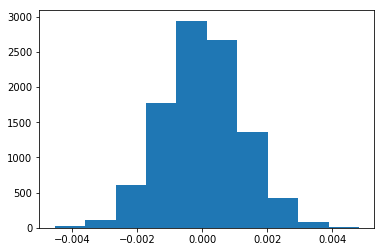

In [29]:
# convert to numpy array
p_diffs=np.array(p_diffs)

#plot sampling distribution
plt.hist(p_diffs);

**This histogram looks like what I expect. I expect to have a normal distribution of the sample size centered around 0**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# calculate the obs_diff
obs_diff=treatment_conv-control_conv
obs_diff

-0.0015782389853555567

In [31]:
#simulate the distribution under the null hypothesis
null_vals=np.random.normal(0, p_diffs.std(), df2.shape[0])

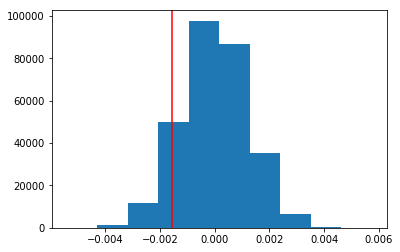

In [32]:
#plot the null distribution
plt.hist(null_vals);

#plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [33]:
#compute p-value
(null_vals>obs_diff).mean()

0.90327753764832197

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Now we can conclude, with a type I error rate of 0.05, that we fail to reject the null hypothesis. We do not have sufficient evidence to suggest that the new treatment page leads to more conversions(p-value=0.907>0.05). Therefore, these results are not statistically and practically sufficiently evident to make changes on the page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2['landing_page'][df2['landing_page']=="old_page"][df2['converted']==1].count()
convert_new = df2['landing_page'][df2['landing_page']=="new_page"][df2['converted']==1].count()
n_old = df2['landing_page'][df2['landing_page']=="old_page"].count()
n_new = df2['landing_page'][df2['landing_page']=="new_page"].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
#calculating the zscore and pvalue using the one sample z-test
z_score, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The calculated p-value through the one sample z-test enforces our conclusion: fail to reject the null hypothesis and affirms that we didn't have sufficient evidence that the new treatment page leads to more conversions. These results agree with the findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we predict a probability between 1 and 0, we must use the logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
#create a dummy variable column for which page each user received without forget the intercept 
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']

df2['intercept']=1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
log_mod=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results=log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-20 12:38 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
#since the returned value is lower than one, we will use the reciprocal
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

**The individual who receive the old page are 1.5% more likely to achieve a conversion comparing to those who receive the new page. But this percentage is not significant (p_value=0.1899)**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p_value associated with ab_page in the logistic regression is 0.1899 noting that in logistic regression p is a binomial proportion and x is the explanatory variable where the outcome is treated as unique and dynamically. It differs from the z-test by being two-tailed test comparing to one_tailed test for z-test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Sometimes adding some factors to the regression might give us more information regarding the decision of individual to converts or not, but many  times adding multiple factors to the regression results in increasing its compelxity and difficulties of analysis from both approaches: statistical and practical.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
#read the csv file 
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
df_countries.shape

(290584, 2)

In [42]:
#merge the two datasets on the appropriate rows
df3= pd.merge(left=df2, right=df_countries, left_on='user_id', right_on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [43]:
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [44]:
#create a dummy variable column for each country without forget the intercept 
df3[['CA', 'UK', 'US']]=pd.get_dummies(df3['country'])

df3['intercept']=1

In [45]:
df3.head(10)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [46]:
log_mod=sm.Logit(df3['converted'], df3[['intercept', 'UK','US']])
results=log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-20 12:38 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [47]:
np.exp(results.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

**In this analysis, I took the CA as the baseline of my results. Results show that the p_value of US and UK, which are 0.1291 and 0.0740 respectively, are greater than 0.05, meaning that the country of the user doesn't have a significant impact on the conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
#to check if the country of the user is the moderator of the effect
#of ab_page on the conversion rate. we need to create a new variables
# showing the combination of country and ab_page, therefore 
df3['ab_CA']=df3['ab_page']*df3['CA']
df3['ab_UK']=df3['ab_page']*df3['UK']
df3['ab_US']=df3['ab_page']*df3['US']

In [49]:
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,ab_CA,ab_UK,ab_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1,0,0,0


In [50]:
#now let's run a new logistic regression with new variables interactions
log_mod=sm.Logit(df3['converted'], df3[['intercept', 'UK','US', 'ab_CA','ab_UK','ab_US']])
results=log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-20 12:38 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_CA         -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
ab_UK          0.0108    0.0228    0.4749  0.6349  -0.0339   0.0555
ab_US         -0.0206    0.0137   -1.5052  0.1323  -0.0473   0.0062
==================================================================

"""

**Based on the above logistic regression, and since non of the new variables of interactions between countries and the page is significant, we can conclude that there is no evidence of interactions between the country of the user, the received page and the conversion. Therefore, these interactions have no effect on predictions of conversion from the statistical and practical point of vue.**

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0